# <center> Simulator (custom)</center>

This code is used to create synthetic twitter datasets according to the model. We create a user graph and choose an activity pair $(\lambda,\mu)$ for each user . From there we can generate events of tweeting/retweeting where each user $i$ tweets with rate $\lambda_i$ and retweets from his newsfeed with rate $\mu_i$. The output consists of two `.txt` files, one being the adjacency list of the user graph and the other the list of tweets.

In [2]:
import numpy as np
import networkx as nx
import random as random
from operator import itemgetter
import matplotlib.pyplot as plt

Choose out folder where the results will be written.

In [3]:
out_folder = "../Newman/rapportStage/"

## Setting parameters
Choose the number of users $N$, the number of events `nb_events` and the activity rates. The latter are in the form of two lists of length $N$: `Lambda` and `Mu` where `Lambda[i]` is the posting rate of user $i$ and `Mu[i]` is her reposting rate.

In [4]:
N = 100
w = 0.05
nb_events = 10000
# nb_events = 40*w*N*(N-1)

# Lambda = np.random.normal(10, 2, N)
# Lambda -= np.min(Lambda)
# Mu = np.random.normal(10, 2, N)
# Mu -= np.min(Mu)

Lambda = np.random.pareto(1.3, N)
Mu = np.random.pareto(1.3, N)

# Lambda = [0.1 for n in range(N)]
# Mu = [0.1 for n in range(N)]

# Lambda = np.random.random(N)
# Mu = np.random.random(N)

## 1. User graph creation

### Erdos-Renyi

We represent the user graph with a dictionary `Followers` where `Followers[i]` is the set of leaders of user $i$.

In [56]:
# example: graph Erdös-Rényi of parameter w
Followers = {i:set() for i in range(N)}
for i in range(N):
    for j in range(N):
        if j != i and np.random.random() < w:
            Followers[i].add(j)
print("Number of edges: ", sum([len(Followers[i]) for i in range(N)]))

Number of edges:  470


Check connectedness of graph.

In [74]:
G = nx.DiGraph()
for lead in Followers:
    for follow in Followers[lead]:
        G.add_edge(lead,follow)
print(nx.is_strongly_connected(G), nx.is_weakly_connected(G))

False True


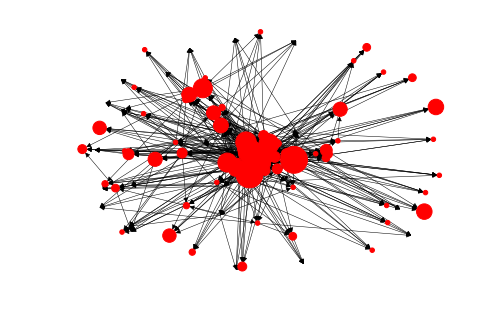

In [75]:
nx.draw(G, node_size=[20*len(Followers[n]) for n in range(N)], width=.5)
plt.savefig(out_folder + "graph_power.pdf")

Write adjacency list on file.

In [76]:
graph_out = open(out_folder + "adjList_power.txt", "w")
for i in Followers:
    for j in Followers[i]:
        graph_out.write("{} {}\n".format(i,j))
graph_out.close()

### Directed scale-free graph.

In [6]:
G = nx.DiGraph()
a, b, c = 1/8, 3/4, 1/8
d_in, d_out = 1, 1
G.add_node(0)
next_node = 1
while G.number_of_nodes() < N:
    nodes = list(G.nodes())
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    action = np.random.choice(['A', 'B', 'C'], p=[a,b,c])
    if action == 'A':
        v = next_node
        probas = [(G.in_degree(n) + d_in) / (n_edges + d_in*n_nodes) for n in nodes]
        w = np.random.choice(nodes, p=probas)
        G.add_edge(v,w)
        next_node += 1
    if action == 'B':
        v, w = 0, 0
        while v == w: # stop self edges
            probas = [(G.out_degree(n) + d_out) / (n_edges + d_out*n_nodes) for n in nodes]
            v = np.random.choice(nodes, p=probas)
            probas = [(G.in_degree(n) + d_in) / (n_edges + d_in*n_nodes) for n in nodes]
            w = np.random.choice(nodes, p=probas)
            print(v,w)
        G.add_edge(v,w)
    if action == 'C':
        w = next_node
        probas = [(G.out_degree(n) + d_out) / (n_edges + d_out*n_nodes) for n in nodes]
        v = np.random.choice(nodes, p=probas)
        G.add_edge(v,w)
        next_node += 1
print("Number of edges: ", G.number_of_edges())
print("strong, weak connectedness : ", nx.is_strongly_connected(G), nx.is_weakly_connected(G))

2 1
0 0
2 0
0 2
2 2
1 0
0 1
1 3
0 2
0 3
0 3
0 3
0 1
0 3
0 0
2 3
4 1
0 3
0 1
0 3
1 6
4 6
1 8
1 6
0 4
4 6
6 5
2 6
4 8
0 12
12 6
0 5
0 6
0 6
14 7
0 8
2 6
10 9
12 6
8 6
2 13
1 3
11 3
5 5
6 1
16 17
12 17
0 11
6 12
0 0
3 11
2 8
12 8
2 8
5 17
1 6
2 12
10 7
14 0
0 12
4 14
0 10
15 7
0 1
19 7
3 11
7 10
13 11
14 11
16 9
6 17
12 5
0 18
11 12
1 3
14 11
7 12
21 18
3 3
4 9
13 11
14 1
19 1
21 18
1 7
15 3
14 7
9 14
20 24
1 3
15 14
4 3
1 4
5 12
0 11
10 9
7 15
16 5
10 13
2 23
24 12
22 7
19 6
10 30
3 8
33 10
11 3
12 5
4 23
15 7
27 12
0 19
19 28
29 15
0 29
16 7
6 7
1 6
4 2
8 8
7 3
19 11
5 3
15 29
16 9
1 14
0 14
6 1
17 28
15 14
0 6
35 6
1 8
4 5
13 11
13 23
6 18
0 3
4 15
16 39
6 2
17 13
0 17
19 8
4 40
4 13
27 36
21 29
19 14
10 8
39 14
13 19
17 12
48 12
47 14
15 28
40 36
39 29
2 24
1 11
14 3
10 12
16 29
0 30
0 29
1 46
25 47
47 29
14 9
13 30
35 3
51 2
1 14
59 12
19 3
2 6
14 14
2 0
14 18
14 7
1 42
0 46
51 53
1 2
10 37
60 31
1 26
7 5
19 37
27 6
30 24
27 14
11 9
68 4
14 11
21 12
5 12
65 3
23 15
21 5
2 69
4 5
13 2

In [7]:
nodes = [x for x in G.nodes if G.in_degree(x) > 0]
gamma = 1 + len(nodes) / sum([np.log(G.in_degree[x]) for x in nodes])
print("gamma in ", gamma)
nodes = [x for x in G.nodes if G.out_degree(x) > 0]
gamma = 1 + len(nodes) / sum([np.log(G.out_degree[x]) for x in nodes])
print("gamma out ", gamma)

gamma in  2.1134529665227983
gamma out  2.1075664027914414


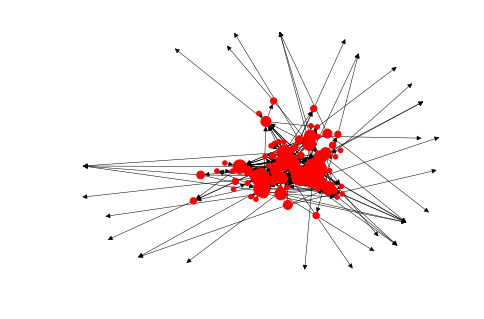

In [8]:
nx.draw(G, node_size=[20*G.out_degree[n] for n in G.nodes], width=.5)
plt.savefig(out_folder + "graph_power.pdf")

In [9]:
graph_out = open(out_folder + "adjList_power.txt", "w")
for e in G.edges:
    graph_out.write("{} {}\n".format(e[0],e[1]))
graph_out.close()

Create followers dict.

In [17]:
Followers = {n:set() for n in range(N)}
for e in G.edges:
    lead, follow = e[0], e[1]
    Followers[lead].add(follow)

## 2. Events creation

We generate a list `events` where the $i^{th}$ entry corresponds to the $i^{th}$ event occurring on the network. Each event is described as a tuple `twid timestamp userid rtid`, with
- `twid` is the unique id of the tweet, $\in \{1, \ldots, nb\_events\}$
- `timestamp` is the instant of occurence (seconds since the beginning)
- `userid` is the unique id $\in \{1, \ldots, N\}$ of the (re)tweeting user
- `rtid` is the id of the original tweet in case of retweet, else is set to -1.

In [18]:
news = {i:list() for i in range(N)} # initialization of the newsfeeds
M = 1 # newsfeeds max size
next_twid = 1 # id of the next post
time = 0 # time since the beginning
Events = list() # list of events (output)

while len(Events) < nb_events:
    
    # generate exponential variates of scale 1/lambda, 1/mu for each user
    waiting_time = set()
    for n in range(N):
        if Lambda[n] > 0:
            waiting_time.add((n, 'post', np.random.exponential(1/Lambda[n])))
        if Mu[n] > 0:
            waiting_time.add((n, 'repost', np.random.exponential(1/Mu[n])))

    # next_event
    user, event_type, wait = min(waiting_time, key=itemgetter(2))
    time += wait
    if event_type == 'post':
        new_post = (next_twid, time, user, -1) # create new post
    else:
        if len(news[user]) == 0: # skip step if nothing to repost in the user's newsfeed
            continue
        else:
            retweeted = random.choice(news[user]) # choose what to retweet
            if retweeted[-1] == -1: # get original id
                rtid = retweeted[0]
            else:
                rtid = retweeted[-1]
            new_post = (next_twid, time, user, rtid) # create new_post
            
            
    # append new post to the events list and update next_twid
    Events.append(new_post)
    next_twid += 1

    # update newfeeds for followers of active user
    for j in Followers[user]:
        if len(news[j]) == M: # remove something at random if newsfeed is full
            news[j].remove(random.choice(news[j]))
        news[j].append(new_post) # add new post to newsfeed

Look at first events.

In [19]:
Events[:10]

[(1, 0.002484055072516158, 85, -1),
 (2, 0.006617376663445858, 56, -1),
 (3, 0.008911607768234504, 98, -1),
 (4, 0.010856463123318161, 99, -1),
 (5, 0.0137722536461546, 10, -1),
 (6, 0.01427960755043431, 56, -1),
 (7, 0.014667557696713532, 79, -1),
 (8, 0.019444210585588442, 56, -1),
 (9, 0.02136048143267648, 62, -1),
 (10, 0.021823072135055764, 80, -1)]

Write events list to `outfolder/trace.txt`. Each line is an entry of the list.

In [20]:
out = open(out_folder + "trace_power.txt", "w")
for e in Events:
    out.write("{} {} {} {}\n".format(e[0], e[1], e[2], e[3]))
out.close()

Old algo.

In [ ]:
news = {i:list() for i in range(N)} # initialization of the newsfeeds
M = 1 # newsfeeds max size
next_twid = 1 # id of the next post
time = 0 # time since the beginning
Events = list() # list of events (output)

while len(Events) < nb_events:
    
    posting_time = np.random.exponential([1/x for x in Lambda], N)
    reposting_time = np.random.exponential([1/x for x in Mu], N)
    
    # get closest posting time and reposting time ---> next event will be the closest between both
    min_post = np.min(posting_time)
    min_repost = np.min(reposting_time)
    
    # if the next event is a post
    if min_post < min_repost:
        time += min_post
        user = np.argmin(posting_time)
        new_post = (next_twid, time, user, -1) # create new post
    
    # if repost
    elif min_repost < min_post:
        time += min_repost
        user = np.argmin(reposting_time)
        if len(news[user]) == 0: # skip step if nothing to repost in the user's newsfeed
            continue
        else:
            retweeted = random.choice(news[user]) # choose what to retweet
            if retweeted[-1] == -1: # get original id
                rtid = retweeted[0]
            else:
                rtid = retweeted[-1]
            new_post = (next_twid, time, user, rtid) # create new_post
            
            
    # append new post to the events list and update next_twid
    Events.append(new_post)
    next_twid += 1

    # update newfeeds for followers of active user
    for j in Followers[user]:
        if len(news[j]) == M: # remove something at random if newsfeed is full
            news[j].remove(random.choice(news[j]))
        news[j].append(new_post) # add new post to newsfeed